In [120]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

# Loading the dataset

In [154]:
data = pd.read_csv(r'C:\Users\Acer\Desktop\python mini project\indian_liver_patient(1).csv')

In [155]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [156]:
data.shape

(9328, 11)

In [157]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9264.000000,9328.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.176810,6.204527,2.806238,242.742560,182.473449,288.686111,1.084578,0.794879,0.319333,0.452126
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


# Converting the dataset column 

In [158]:
def convert_dataset(x):
    if x==2:
        return 0
    return 1
data['Dataset']=data['Dataset'].map(convert_dataset)

In [159]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [160]:
data.Dataset.value_counts()

Dataset
1    6656
0    2672
Name: count, dtype: int64

In [161]:
data.describe(include=['object'])

,Gender
count,9328
unique,2
top,Male
freq,7056


<Axes: xlabel='Gender', ylabel='count'>

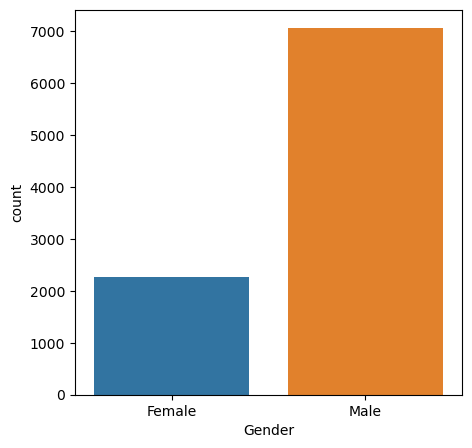

In [162]:
plt.figure(figsize=(5,5))
sns.countplot(x='Gender',data=data)

# Converting the male to 1 and female to 0

In [163]:
def convert_gender(x):
    if x=='Male':
        return 1
    else:
        return 0
data['Gender']=data['Gender'].map(convert_gender)

In [164]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [165]:
data.shape

(9328, 11)

# Dealing with outliers

In [166]:
data.columns

Index(['Age', 'Gender', 'Total_Bilirubin', 'Direct_Bilirubin',
       'Alkaline_Phosphotase', 'Alamine_Aminotransferase',
       'Aspartate_Aminotransferase', 'Total_Protiens', 'Albumin',
       'Albumin_and_Globulin_Ratio', 'Dataset'],
      dtype='object')

In [167]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9328.000000,9264.000000,9328.000000
mean,44.746141,0.756432,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,0.713551
std,16.176810,0.429258,6.204527,2.806238,242.742560,182.473449,288.686111,1.084578,0.794879,0.319333,0.452126
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,1.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,1.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


# Z-score Method

# Aspartate_Aminotransferase

## Finding the outliers

In [204]:
print("Outliers for the column Aspartate_Aminotransferase")
upper_limit=data['Aspartate_Aminotransferase'].mean() + 1*data['Aspartate_Aminotransferase'].std()
lower_limit=data['Aspartate_Aminotransferase'].mean() - 1*data['Aspartate_Aminotransferase'].std()
print(upper_limit)
print(lower_limit)

Outliers for the column Aspartate_Aminotransferase
44.43522720214077
17.586995020081453


In [169]:
data.loc[(data['Aspartate_Aminotransferase'] > upper_limit) | (data['Aspartate_Aminotransferase'] < lower_limit)]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
16,38,1,1.8,0.8,342,168,441,7.6,4.4,1.3,1
25,34,1,4.1,2.0,289,875,731,5.0,2.7,1.1,1
26,34,1,4.1,2.0,289,875,731,5.0,2.7,1.1,1
27,34,1,6.2,3.0,240,1680,850,7.2,4.0,1.2,1
43,50,1,2.6,1.2,415,407,576,6.4,3.2,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
9239,25,1,0.7,0.2,185,196,401,6.5,3.9,1.5,1
9254,46,1,20.0,10.0,254,140,540,5.4,3.0,1.2,1
9264,35,1,26.3,12.1,108,168,630,9.2,2.0,0.3,1
9278,46,0,1.4,0.4,298,509,623,3.6,1.0,0.3,1


In [205]:
#Trimming - delete the outlier data
data = data.loc[(data['Aspartate_Aminotransferase'] < upper_limit) & (data['Aspartate_Aminotransferase'] > lower_limit)]

In [206]:
data.Aspartate_Aminotransferase.sort_values(ascending=False).head()

9201    43
8618    43
4537    43
3296    43
9299    43
Name: Aspartate_Aminotransferase, dtype: int64

In [207]:
data=data[data.Aspartate_Aminotransferase <=75]

In [208]:
data.shape

(2096, 11)

In [209]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000,2096.000000
mean,46.992366,0.709924,1.213740,0.435115,189.290076,28.664122,28.465649,6.571756,3.312214,0.999924,0.572519
std,16.395352,0.453906,1.769657,1.041161,15.882378,9.941585,7.168531,1.076246,0.772414,0.263888,0.494831
min,13.000000,0.000000,0.500000,0.100000,162.000000,13.000000,18.000000,3.000000,1.400000,0.400000,0.000000
25%,33.000000,0.000000,0.700000,0.200000,176.000000,21.000000,22.000000,5.900000,2.900000,0.800000,0.000000
50%,47.000000,1.000000,0.800000,0.200000,189.000000,26.000000,28.000000,6.700000,3.300000,1.000000,1.000000
75%,60.000000,1.000000,1.100000,0.400000,201.000000,35.000000,34.000000,7.300000,4.000000,1.100000,1.000000
max,84.000000,1.000000,20.200000,11.700000,220.000000,52.000000,43.000000,9.200000,4.900000,1.800000,1.000000


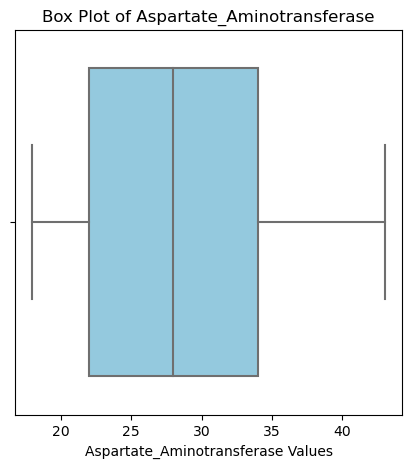

In [210]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=data['Aspartate_Aminotransferase'], color='skyblue')
plt.title('Box Plot of Aspartate_Aminotransferase')
plt.xlabel('Aspartate_Aminotransferase Values')
plt.show()

# 	Alkaline_Phosphotase

In [211]:
upper_limit=data['Alkaline_Phosphotase'].mean() + 1*data['Alkaline_Phosphotase'].std()
lower_limit=data['Alkaline_Phosphotase'].mean() - 1*data['Alkaline_Phosphotase'].std()
print("upper limit:",upper_limit)
print("lower limit:",lower_limit)

upper limit: 205.17245476082763
lower limit: 173.4076979109281


In [212]:
data = data.loc[(data['Alkaline_Phosphotase'] < upper_limit) & (data['Alkaline_Phosphotase'] > lower_limit)]

In [213]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,45.130952,0.714286,1.204762,0.439286,189.678571,28.654762,28.642857,6.675000,3.413095,1.033690,0.571429
std,16.658654,0.451922,2.133024,1.264065,9.201199,9.709397,7.153491,1.007714,0.762139,0.285019,0.495056
min,13.000000,0.000000,0.600000,0.100000,175.000000,13.000000,18.000000,3.900000,1.700000,0.500000,0.000000
25%,32.750000,0.000000,0.700000,0.200000,182.000000,20.000000,22.000000,6.000000,2.900000,0.800000,0.000000
50%,42.500000,1.000000,0.800000,0.200000,190.000000,27.500000,28.000000,6.800000,3.400000,1.000000,1.000000
75%,58.000000,1.000000,1.000000,0.300000,198.000000,36.000000,34.000000,7.300000,4.000000,1.200000,1.000000
max,84.000000,1.000000,20.200000,11.700000,205.000000,52.000000,43.000000,9.200000,4.900000,1.800000,1.000000


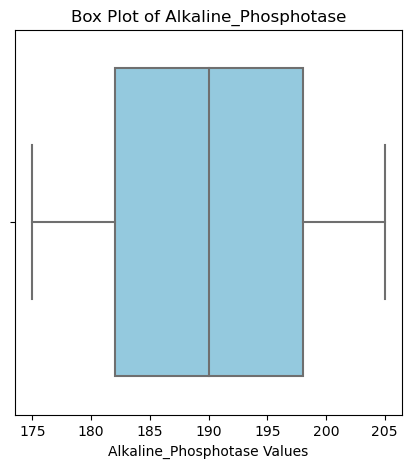

In [214]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=data['Alkaline_Phosphotase'], color='skyblue')
plt.title('Box Plot of Alkaline_Phosphotase')
plt.xlabel('Alkaline_Phosphotase Values')
plt.show()

In [215]:
data.describe()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000,1344.000000
mean,45.130952,0.714286,1.204762,0.439286,189.678571,28.654762,28.642857,6.675000,3.413095,1.033690,0.571429
std,16.658654,0.451922,2.133024,1.264065,9.201199,9.709397,7.153491,1.007714,0.762139,0.285019,0.495056
min,13.000000,0.000000,0.600000,0.100000,175.000000,13.000000,18.000000,3.900000,1.700000,0.500000,0.000000
25%,32.750000,0.000000,0.700000,0.200000,182.000000,20.000000,22.000000,6.000000,2.900000,0.800000,0.000000
50%,42.500000,1.000000,0.800000,0.200000,190.000000,27.500000,28.000000,6.800000,3.400000,1.000000,1.000000
75%,58.000000,1.000000,1.000000,0.300000,198.000000,36.000000,34.000000,7.300000,4.000000,1.200000,1.000000
max,84.000000,1.000000,20.200000,11.700000,205.000000,52.000000,43.000000,9.200000,4.900000,1.800000,1.000000


In [216]:
upper_limit=data['Alamine_Aminotransferase'].mean() + 1*data['Alamine_Aminotransferase'].std()
lower_limit=data['Alamine_Aminotransferase'].mean() - 1*data['Alamine_Aminotransferase'].std()
print("upper limit:",upper_limit)
print("lower limit:",lower_limit)

upper limit: 38.364158506542566
lower limit: 18.94536530298124


In [217]:
data = data.loc[(data['Alamine_Aminotransferase'] < upper_limit) & (data['Alamine_Aminotransferase'] > lower_limit)]

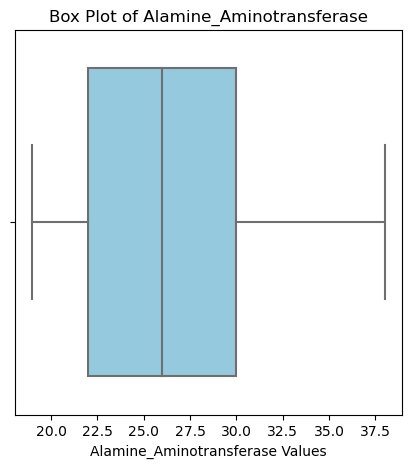

In [218]:
plt.figure(figsize=(5, 5))
sns.boxplot(x=data['Alamine_Aminotransferase'], color='skyblue')
plt.title('Box Plot of Alamine_Aminotransferase')
plt.xlabel('Alamine_Aminotransferase Values')
plt.show()

In [219]:
data.shape

(912, 11)

In [220]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

In [221]:
data=data.dropna(how='any')

In [222]:
Y=data['Dataset']
X=data.drop('Dataset',axis=1)

In [223]:
scaler = StandardScaler()
X=scaler.fit_transform(X)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,train_size=0.2)

In [224]:
Y.sum()/len(Y)

0.5263157894736842

In [225]:
data.shape

(912, 11)

In [230]:
inputs = tf.keras.Input(shape=(10))
x = tf.keras.layers.Dense(128, activation='relu')(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Dropout(0.5)(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc')]
)

batch_size = 64
epochs = 100 # The training process runs for 100 epochs, meaning the entire training dataset is processed 100 times.

history = model.fit(
    X_train,
    Y_train,
    validation_split=0.2,
    epochs=epochs,
    verbose=1,  # Set to 1 for training progress
    batch_size=batch_size
)

Epoch 1/100
3/3 [==============================] - 2s 166ms/step - loss: 0.8642 - accuracy: 0.4966 - auc: 0.4980 - val_loss: 0.6676 - val_accuracy: 0.7297 - val_auc: 0.7197
Epoch 2/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7772 - accuracy: 0.5034 - auc: 0.5007 - val_loss: 0.6657 - val_accuracy: 0.7568 - val_auc: 0.7182
Epoch 3/100
3/3 [==============================] - 0s 23ms/step - loss: 0.8301 - accuracy: 0.5172 - auc: 0.5122 - val_loss: 0.6641 - val_accuracy: 0.7568 - val_auc: 0.7212
Epoch 4/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6718 - accuracy: 0.6000 - auc: 0.6506 - val_loss: 0.6623 - val_accuracy: 0.7568 - val_auc: 0.7288
Epoch 5/100
3/3 [==============================] - 0s 20ms/step - loss: 0.7023 - accuracy: 0.6000 - auc: 0.6106 - val_loss: 0.6593 - val_accuracy: 0.6757 - val_auc: 0.7333
Epoch 6/100
3/3 [==============================] - 0s 20ms/step - loss: 0.6940 - accuracy: 0.6000 - auc: 0.6311 - val_loss: 0.6573 - val_ac

3/3 [==============================] - 0s 21ms/step - loss: 0.3934 - accuracy: 0.7862 - auc: 0.8991 - val_loss: 0.4495 - val_accuracy: 0.8378 - val_auc: 0.9485
Epoch 49/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3911 - accuracy: 0.8000 - auc: 0.9017 - val_loss: 0.4483 - val_accuracy: 0.8378 - val_auc: 0.9439
Epoch 50/100
3/3 [==============================] - 0s 21ms/step - loss: 0.3834 - accuracy: 0.8069 - auc: 0.9082 - val_loss: 0.4464 - val_accuracy: 0.8378 - val_auc: 0.9394
Epoch 51/100
3/3 [==============================] - 0s 20ms/step - loss: 0.3512 - accuracy: 0.7862 - auc: 0.9150 - val_loss: 0.4461 - val_accuracy: 0.8378 - val_auc: 0.9379
Epoch 52/100
3/3 [==============================] - 0s 20ms/step - loss: 0.4255 - accuracy: 0.8138 - auc: 0.8864 - val_loss: 0.4445 - val_accuracy: 0.8378 - val_auc: 0.9394
Epoch 53/100
3/3 [==============================] - 0s 19ms/step - loss: 0.3446 - accuracy: 0.8621 - auc: 0.9291 - val_loss: 0.4419 - val_accuracy: 

3/3 [==============================] - 0s 20ms/step - loss: 0.2272 - accuracy: 0.8897 - auc: 0.9689 - val_loss: 0.1727 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 96/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2323 - accuracy: 0.9034 - auc: 0.9749 - val_loss: 0.1675 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 97/100
3/3 [==============================] - 0s 20ms/step - loss: 0.1836 - accuracy: 0.9448 - auc: 0.9885 - val_loss: 0.1630 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 98/100
3/3 [==============================] - 0s 25ms/step - loss: 0.2472 - accuracy: 0.9172 - auc: 0.9653 - val_loss: 0.1587 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 99/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2095 - accuracy: 0.9379 - auc: 0.9759 - val_loss: 0.1552 - val_accuracy: 1.0000 - val_auc: 1.0000
Epoch 100/100
3/3 [==============================] - 0s 20ms/step - loss: 0.2314 - accuracy: 0.8966 - auc: 0.9723 - val_loss: 0.1526 - val_accuracy:

In [231]:
model.evaluate(X_test,Y_test)

23/23 [==============================] - 0s 2ms/step - loss: 0.2209 - accuracy: 0.9178 - auc: 0.9986


[0.22089055180549622, 0.9178082346916199, 0.9985525608062744]

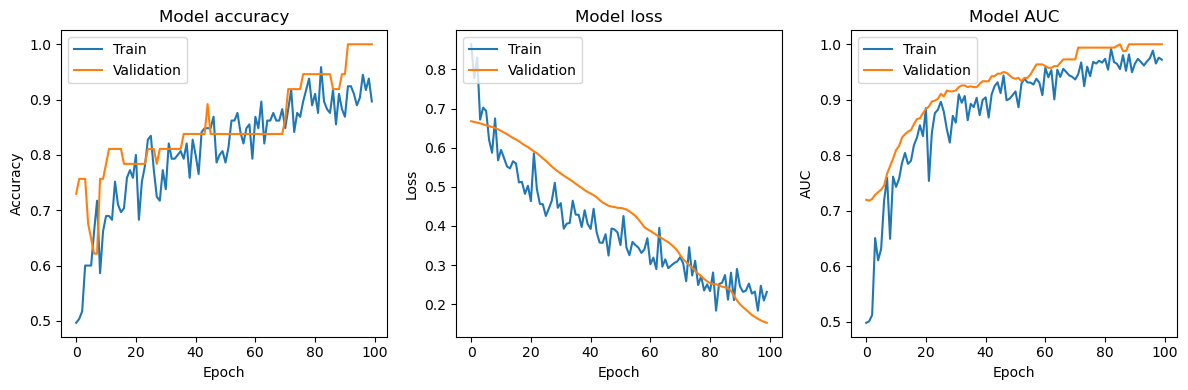

In [232]:
# Plot training history
def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 3, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values // measure of how well the model performs during training 
    plt.subplot(1, 3, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation AUC values // AUC is a metric used in binary classification to check how the model distinguish between 0 and 1 
    plt.subplot(1, 3, 3)
    plt.plot(history.history['auc'])
    plt.plot(history.history['val_auc'])
    plt.title('Model AUC')
    plt.xlabel('Epoch')
    plt.ylabel('AUC')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

# Call the function to plot training history
plot_training_history(history)